Q3. You observe 1-year interbank rates in EUR and USD, as well as spot and 1-year forward
EURUSD quotations.

In [31]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Dataset 
fx = pd.read_csv('01_Data/03_fx.csv')
bonds = pd.read_csv('01_Data/01_mtsfix.csv')

# Preview data
print("FX Data:")
print(fx.tail(7))
print("\nMTSFIX Data:")
print(bonds.head(10))


FX Data:
           Date  EUR1YD  USD1YD     EUR   EUR1Y
303  2025-04-30    1.97    4.02  1.1327  233.17
304  2025-05-31    2.31    4.33  1.1347  264.14
305  2025-06-30    2.02    4.10  1.1786  244.75
306  2025-07-31    2.05    4.25  1.1415  254.30
307  2025-08-31    2.08    4.02  1.1684  219.85
308  2025-09-30    2.12    3.88  1.1733  205.29
309  2025-10-31    1.95    3.84  1.1573  197.92

MTSFIX Data:
     RefDate Type     ISIN Code            Description   Maturity  Mid Price
0  15-Jul-25  DSL  NL0011819040  NETHER 0.500 15/07/26  7/15/2026     98.666
1  15-Jul-25  DSL  NL0012171458  NETHER 0.750 15/07/27  7/15/2027     97.761
2  15-Jul-25  DSL  NL0012818504  NETHER 0.750 15/07/28  7/15/2028     96.277
3  15-Jul-25  DSL  NL0013332430  NETHER 0.250 15/07/29  7/15/2029     92.607
4  15-Jul-25  DSL  NL0014555419      NETHER 0 15/07/30  7/15/2030     89.067
5  15-Jul-25  DSL  NL00150006U0      NETHER 0 15/07/31  7/15/2031     86.419
6  15-Jul-25  DSL  NL0015000RP1  NETHER 0.500 15/07/32

a) You are in July 2025, and you need to finance a $100’000 purchase of equipment for
your business in July 2026. You budget for this by investing in 1-year zero-coupon DSLs
(assume prices as of July 15 in question 1), and hedging the FX risk by selling the
proceeds from the DSL investment into USD one year forward at the market EURUSD
forward rate. How much do you need to invest in the DSL in July 2025 to get the desired
amount of USD in July 2026?



### Given Data (July 2025)

| Parameter | Value |
|-----------|-------|
| 1-Year DSL Price | 98.666 | 
| EURUSD Spot | 1.1415 | 
| 1Y Forward Points | 254.30 | 

### Calculation


In [32]:
# Given data
bond_price = 98.666
spot_rate = 1.1415
forward_points = 254.30
target_usd = 100_000

# Calculate forward rate
forward_rate = spot_rate + forward_points / 10_000
print(f"Forward Rate: {forward_rate:.5f}")

# EUR needed at maturity
eur_at_maturity = target_usd / forward_rate
print(f"EUR at Maturity: €{eur_at_maturity:,.2f}")

# Initial investment (zero-coupon bond matures at par)
investment = (bond_price / 100) * eur_at_maturity
print(f"\nInvestment Required: €{investment:,.2f}")

# Verification
bond_payoff = investment * (100 / bond_price)
usd_received = bond_payoff * forward_rate
print(f"\nVerification:")
print(f"  Bond payoff: €{bond_payoff:,.2f}")
print(f"  USD received: ${usd_received:,.2f}")


Forward Rate: 1.16693
EUR at Maturity: €85,694.94

Investment Required: €84,551.77

Verification:
  Bond payoff: €85,694.94
  USD received: $100,000.00


### Answer

**€84,551.77** must be invested in 1-year zero-coupon DSLs in July 2025.



b) For the entire sample period in 03_fx.csv, calculate the 1-year EURUSD forward rate
implied by the CIRP, and plot it vis-a-vis the respective market forward rate.

**CIRP Formula:**

$$F_{CIRP} = S \times \frac{1 + i_{USD}}{1 + i_{EUR}}$$

where $S$ is the spot rate, $i_{USD}$ and $i_{EUR}$ are the 1-year deposit rates.

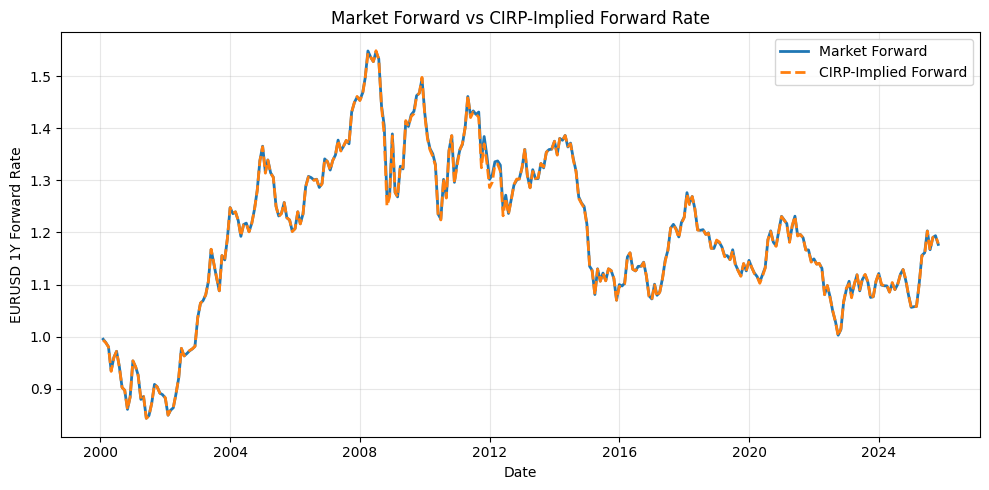

In [36]:
# Calculate CIRP-implied forward rate
fx['CIRP_Fwd'] = fx['EUR'] * (1 + fx['USD1YD']/100) / (1 + fx['EUR1YD']/100)

# Market forward rate (spot + forward points)
fx['Market_Fwd'] = fx['EUR'] + fx['EUR1Y'] / 10_000

# Plot
plt.figure(figsize=(10, 5))
plt.plot(fx['Date'], fx['Market_Fwd'], label='Market Forward', linewidth=2)
plt.plot(fx['Date'], fx['CIRP_Fwd'], label='CIRP-Implied Forward', linewidth=2, linestyle='--')
plt.xlabel('Date')
plt.ylabel('EURUSD 1Y Forward Rate')
plt.title('Market Forward vs CIRP-Implied Forward Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


c) Calculate and plot 1-year EURUSD basis. In which calendar years in the sample period
is the average yearly basis significantly different from zero at the 95% confidence level?

**Basis Definition:**

$$\text{Basis (bps)} = \left(\frac{F_{market}}{F_{CIRP}} - 1\right) \times 10,000$$


Yearly Basis Analysis:
2000: Mean =    4.69 bps, t-stat =   2.60, p-value = 0.0249 **
2001: Mean =    1.07 bps, t-stat =   0.71, p-value = 0.4930 
2002: Mean =   -2.28 bps, t-stat =  -3.21, p-value = 0.0083 ***
2003: Mean =   -2.20 bps, t-stat =  -2.14, p-value = 0.0554 *
2004: Mean =    1.78 bps, t-stat =   1.61, p-value = 0.1360 
2005: Mean =    4.16 bps, t-stat =   3.47, p-value = 0.0052 ***
2006: Mean =    3.44 bps, t-stat =   4.83, p-value = 0.0005 ***
2007: Mean =    0.57 bps, t-stat =   0.40, p-value = 0.6971 
2008: Mean =   31.30 bps, t-stat =   1.97, p-value = 0.0750 *
2009: Mean =    1.24 bps, t-stat =   0.24, p-value = 0.8134 
2010: Mean =   16.50 bps, t-stat =   3.62, p-value = 0.0040 ***
2011: Mean =   42.49 bps, t-stat =   2.80, p-value = 0.0173 **
2012: Mean =   35.05 bps, t-stat =   2.84, p-value = 0.0160 **
2013: Mean =   -1.51 bps, t-stat =  -0.46, p-value = 0.6547 
2014: Mean =    9.24 bps, t-stat =   3.31, p-value = 0.0069 ***
2015: Mean =    4.66 bps, t-stat =   1.

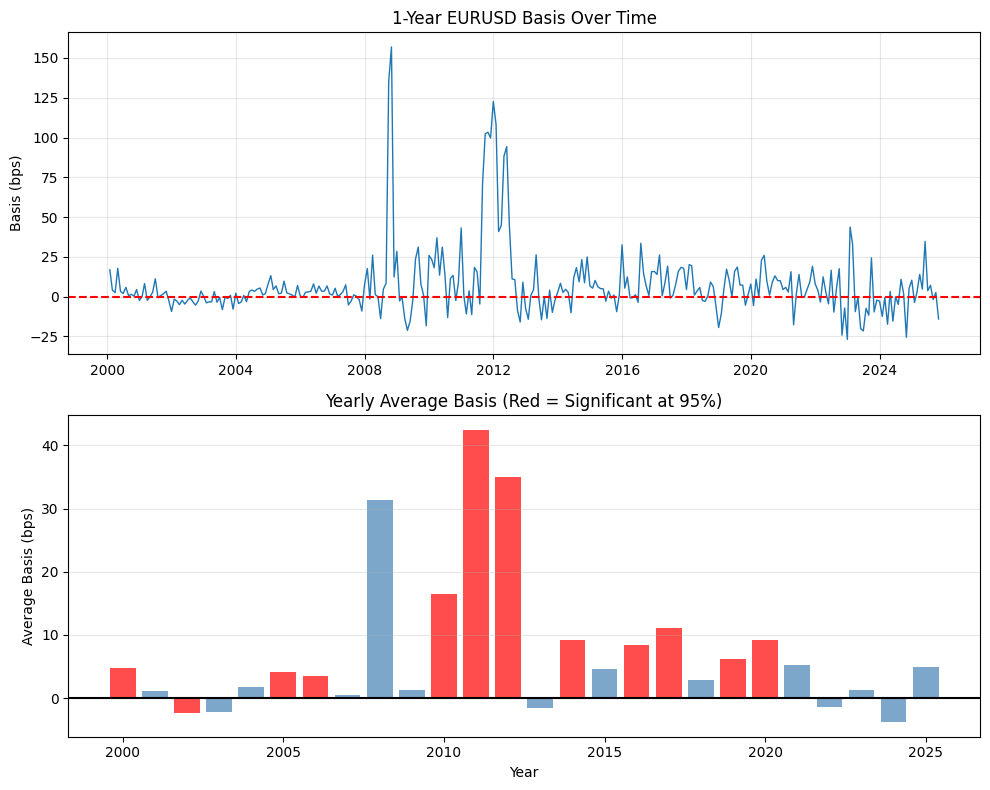

In [38]:
# Calculate basis (already have Market_Fwd and CIRP_Fwd from part b)
fx['Basis_bps'] = (fx['Market_Fwd'] / fx['CIRP_Fwd'] - 1) * 10_000
fx['Year'] = fx['Date'].dt.year

# Yearly statistics and t-tests
yearly = fx.groupby('Year')['Basis_bps'].agg(['mean', 'std', 'count']).reset_index()
yearly['t_stat'] = yearly['mean'] / (yearly['std'] / np.sqrt(yearly['count']))
yearly['p_value'] = 2 * (1 - stats.t.cdf(np.abs(yearly['t_stat']), yearly['count'] - 1))

# Add significance stars
def add_stars(p_val):
    if p_val < 0.01:
        return '***'
    elif p_val < 0.05:
        return '**'
    elif p_val < 0.10:
        return '*'
    else:
        return ''

yearly['Sig'] = yearly['p_value'].apply(add_stars)

# Display all years with significance markers
print("Yearly Basis Analysis:")
print("=" * 70)
for _, row in yearly.iterrows():
    print(f"{int(row['Year'])}: Mean = {row['mean']:7.2f} bps, "
          f"t-stat = {row['t_stat']:6.2f}, p-value = {row['p_value']:.4f} {row['Sig']}")
print("=" * 70)
print("Significance: *** p<0.01, ** p<0.05, * p<0.10")

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Time series
ax1.plot(fx['Date'], fx['Basis_bps'], linewidth=1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_ylabel('Basis (bps)')
ax1.set_title('1-Year EURUSD Basis Over Time')
ax1.grid(alpha=0.3)

# Yearly averages
colors = ['red' if p < 0.05 else 'steelblue' for p in yearly['p_value']]
ax2.bar(yearly['Year'], yearly['mean'], color=colors, alpha=0.7)
ax2.axhline(0, color='black')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Basis (bps)')
ax2.set_title('Yearly Average Basis (Red = Significant at 95%)')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()




**Interpretation:** Red bars indicate years where the basis is significantly different from zero, suggesting CIRP violations due to market frictions, credit risk, or regulatory constraints.


### Appendix: Solving other parts for verification


**Q1**